# Aula 2 - Data Science

In [14]:
url = "https://drive.google.com/uc?id=1Jgto7psHaMRTAVzcFt7D6SgJiHMB7uGT"
url_estudantes = "https://drive.google.com/uc?id=15aOJIGAyLMSY1gecjiCgu2ko_riIcKQy"


In [4]:

import pandas as pd

In [7]:
df = pd.read_csv(url)


In [104]:
sum(df['Orcamento_Anual'])

24649428

In [23]:
df.insert(len(df.columns), 'Gasto_Per_Capita', df['Orcamento_Anual'] / df['Numero_Alunos'])

In [103]:
df.head()

,ID_Escola,Nome_Escola,Tipo_Escola,Numero_Alunos,Orcamento_Anual,Gasto_Per_Capita
0,0,Escola A,Publica,2917,1910635,655.0
1,1,Escola B,Publica,2949,1884411,639.0
2,2,Escola C,Particular,1761,1056600,600.0
3,3,Escola D,Publica,4635,3022020,652.0
4,4,Escola E,Particular,1468,917500,625.0


In [100]:
id_escola = df['Gasto_Per_Capita'].idxmax()
nome_escola = df.loc[id_escola, 'Nome_Escola']
print(nome_escola)

Escola A


In [109]:
id_escola = df['Gasto_Per_Capita'].idxmin()
nome_escola = df.loc[id_escola, 'Nome_Escola']
print(nome_escola)

Escola F


In [117]:
media = df.groupby('Tipo_Escola')['Numero_Alunos'].mean()
print(f"{round(media)}")

Tipo_Escola
Particular    1524.0
Publica       3854.0
Name: Numero_Alunos, dtype: float64


In [12]:
filtro_orcamento = df[(df['Orcamento_Anual'] > 1500000) & (df['Numero_Alunos'] < 4000)]
print(filtro_orcamento)

    ID_Escola Nome_Escola Tipo_Escola  Numero_Alunos  Orcamento_Anual
0           0    Escola A     Publica           2917          1910635
1           1    Escola B     Publica           2949          1884411
11         11    Escola L     Publica           3999          2547363
13         13    Escola N     Publica           2739          1763916


In [15]:
df_estudantes = pd.read_csv(url_estudantes)

In [44]:
df_estudantes.head()

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica
0,0,Kevin Bradley,M,6,Escola A,66,79
1,1,Paul Smith,M,9,Escola A,94,61
2,2,John Rodriguez,M,9,Escola A,90,60
3,3,Oliver Scott,M,9,Escola A,67,58
4,4,William Ray,F,6,Escola A,97,84


In [26]:
# Quantidade do genero M em cada escola
df_estudantes[df_estudantes['Genero'] == 'M'].groupby('Nome_Escola')['Genero'].count()

Nome_Escola
Escola A    1500
Escola B    1498
Escola C     875
Escola D    2272
Escola E     748
Escola F    1112
Escola G     916
Escola H    2439
Escola I     207
Escola J     455
Escola K     912
Escola L    1985
Escola M    2368
Escola N    1363
Escola O     782
Name: Genero, dtype: int64


In [123]:
# Quantidade do genero F em cada escola
df_estudantes[df_estudantes['Genero'] == 'F'].groupby('Nome_Escola')['Genero'].count()


Nome_Escola
Escola A    1417
Escola B    1451
Escola C     886
Escola D    2363
Escola E     720
Escola F    1171
Escola G     942
Escola H    2537
Escola I     220
Escola J     507
Escola K     888
Escola L    2014
Escola M    2393
Escola N    1376
Escola O     843
Name: Genero, dtype: int64


In [40]:
# Médias das notas de redação do genero F por escola
df_estudantes[df_estudantes['Genero'] == 'F'].groupby('Nome_Escola')['Nota_Redacao'].mean()

Nome_Escola
Escola A    81.450953
Escola B    81.181254
Escola C    83.404063
Escola D    81.059247
Escola E    83.816667
Escola F    83.867635
Escola G    83.992569
Escola H    81.459204
Escola I    83.686364
Escola J    83.676529
Escola K    84.041667
Escola L    80.825720
Escola M    81.326369
Escola N    80.727471
Escola O    83.803084
Name: Nota_Redacao, dtype: float64

In [141]:
# Médias das notas de redação do genero M por escola
df_estudantes[df_estudantes['Genero'] == 'M'].groupby('Nome_Escola')['Nota_Redacao'].mean()

Nome_Escola
Escola A    80.929333
Escola B    81.135514
Escola C    84.051429
Escola D    80.804577
Escola E    83.816845
Escola F    84.117806
Escola G    83.958515
Escola H    80.591636
Escola I    83.951691
Escola J    84.454945
Escola K    83.870614
Escola L    80.662469
Escola M    80.602618
Escola N    80.765224
Escola O    83.818414
Name: Nota_Redacao, dtype: float64

In [143]:
# Médias das notas de redação por escola
df_estudantes.groupby('Nome_Escola')['Nota_Redacao'].mean()

Nome_Escola
Escola A    81.182722
Escola B    81.158020
Escola C    83.725724
Escola D    80.934412
Escola E    83.816757
Escola F    83.989488
Escola G    83.975780
Escola H    81.033963
Escola I    83.814988
Escola J    84.044699
Escola K    83.955000
Escola L    80.744686
Escola M    80.966394
Escola N    80.746258
Escola O    83.810462
Name: Nota_Redacao, dtype: float64

In [139]:
# A menor média das notas de redação
menor_media_redacao_Escolas = df_estudantes.groupby('Nome_Escola')['Nota_Redacao'].mean().min()

In [138]:
# Ordem crescente da média das notas de redação por escola
media_redacao_Escolas = df_estudantes.groupby('Nome_Escola')['Nota_Redacao'].mean().sort_values(ascending=True)

Nome_Escola
Escola L    80.744686
Escola N    80.746258
Escola D    80.934412
Escola M    80.966394
Escola H    81.033963
Escola B    81.158020
Escola A    81.182722
Escola C    83.725724
Escola O    83.810462
Escola I    83.814988
Escola E    83.816757
Escola K    83.955000
Escola G    83.975780
Escola F    83.989488
Escola J    84.044699
Name: Nota_Redacao, dtype: float64


In [71]:
# Quantidade de estudantes por escola em ordem crescente
df_estudantes['Nome_Escola'].value_counts(ascending=True, normalize=False)

Nome_Escola
Escola I     427
Escola J     962
Escola E    1468
Escola O    1625
Escola C    1761
Escola K    1800
Escola G    1858
Escola F    2283
Escola N    2739
Escola A    2917
Escola B    2949
Escola L    3999
Escola D    4635
Escola M    4761
Escola H    4976
Name: count, dtype: int64

In [67]:
# Nome da escola e quantidade de alunos na escola com menor quantidade de alunos
quantidade_alunos = df_estudantes['Nome_Escola'].value_counts(ascending=True, normalize=False).iloc[0]
nome_escola = df_estudantes['Nome_Escola'].value_counts(ascending=True, normalize=False).index[0]
print(f"{nome_escola}: {quantidade_alunos} alunos")

Escola I: 427 alunos


In [106]:
# Nome da escola e quantidade de alunos na escola com maior quantidade de alunos
quantidade_alunos = df_estudantes['Nome_Escola'].value_counts(ascending=False, normalize=False).iloc[0]
nome_escola = df_estudantes['Nome_Escola'].value_counts(ascending=False, normalize=False).index[0]
print(f"{nome_escola}: {quantidade_alunos} alunos")

Escola H: 4976 alunos


In [127]:
# A menor nota de Matemática e Redação para cada estudante de cada escola
df_estudantes.groupby(['Nome_Escola', 'Nome_Estudante'])[['Nota_Matematica', 'Nota_Redacao']].min()

Nota_Matematica  Nota_Redacao
Nome_Escola Nome_Estudante                                  
Escola A    Aaron Booker                    64            81
            Aaron Foster                    89            82
            Aaron Martinez                  72            85
            Aaron Moore                     70            85
            Aaron Rodriguez                 78            75
...                                        ...           ...
Escola O    Yvette Ashley                   74            74
            Zachary Christian               74            94
            Zachary Davis                   69            78
            Zachary Sanchez                 71            74
            Zoe Allen                       83            75

[38249 rows x 2 columns]

In [137]:
# Nomes da escolas e a menor nota de redação
df_estudantes.groupby('Nome_Escola')['Nota_Redacao'].min()

Nome_Escola
Escola A    63
Escola B    63
Escola C    69
Escola D    63
Escola E    69
Escola F    69
Escola G    69
Escola H    63
Escola I    69
Escola J    69
Escola K    69
Escola L    63
Escola M    63
Escola N    63
Escola O    69
Name: Nota_Redacao, dtype: int64

In [113]:
# Nomes da escolas e a maior nota de redação
df_estudantes.groupby('Nome_Escola')['Nota_Redacao'].max()

Nome_Escola
Escola A    99
Escola B    99
Escola C    99
Escola D    99
Escola E    99
Escola F    99
Escola G    99
Escola H    99
Escola I    99
Escola J    99
Escola K    99
Escola L    99
Escola M    99
Escola N    99
Escola O    99
Name: Nota_Redacao, dtype: int64

In [112]:
# Menor nota de matemática
df_estudantes.sort_values(by=['Nota_Matematica'], ascending=True)

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica
26814,26814,Julie Haas,F,9,Escola L,95,55
33071,33071,Lisa Jones,F,7,Escola M,89,55
742,742,Bradley Phillips,M,6,Escola A,70,55
5391,5391,Michael Thomas,M,9,Escola B,66,55
3773,3773,Glen Paul,M,6,Escola B,80,55
...,...,...,...,...,...,...,...
13595,13595,Emily Ingram,F,9,Escola E,86,99
34232,34232,Amanda Roach,F,6,Escola M,93,99
39125,39125,Maria Shields,F,9,Escola O,87,99
30,30,Bobby Harris,M,6,Escola A,94,99


In [99]:
# Menor nota de redação
df_estudantes.sort_values(by=['Nota_Redacao'], ascending=True)

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica
8719,8719,Sonya Knapp,F,7,Escola D,63,80
33164,33164,Meagan Browning MD,F,7,Escola M,63,84
37374,37374,Nicole Kidd,F,7,Escola N,63,55
8722,8722,Ashley Smith,F,6,Escola D,63,87
33414,33414,Michelle Brown,F,7,Escola M,63,72
...,...,...,...,...,...,...,...
15848,15848,Deborah Li,F,7,Escola F,99,96
15808,15808,Danielle Sanchez,F,7,Escola F,99,85
35886,35886,Billy Bailey,M,9,Escola N,99,82
22,22,Julian Stewart,F,8,Escola A,99,84


In [148]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Nome_Escola'>

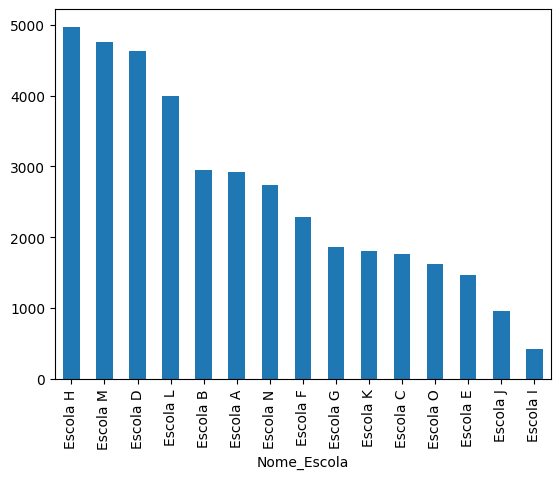

In [150]:
df_estudantes['Nome_Escola'].value_counts().plot(kind='bar')

In [188]:
# Cinco primeiras notas de redação mais altas da escola A
df_filtro = df_estudantes[df_estudantes['Nome_Escola'] == 'Escola A']
df_filtro_sorted = df_filtro.sort_values(by='Nota_Redacao', ascending=False)
resultado = df_filtro_sorted[['Nome_Estudante', 'Nota_Redacao']].head(5)
print(resultado)

      Nome_Estudante  Nota_Redacao
22    Julian Stewart            99
90     Ronald Garcia            99
1001   Theresa Young            99
469      Joel Harper            99
2092   Michael Smith            99
